In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import plotly.express as px
from copy import deepcopy
pd.options.display.max_columns = None

In [3]:
SEED = 42 # setting the seed for all operations downstream

In [4]:
def load() -> pd.DataFrame:
    df = pd.read_pickle("new_data.pickle")

    outsample = df[df["Date Announced"] > "2020-01-01"] # true out of sample, do not touch
    insample = df[df["Date Announced"] <= "2020-01-01"]

    return outsample, insample 

_, df = load()

In [5]:
df.head()

,Success,Date Announced,Date Effective,Date Withdrawn,Deal Number,Target Name,Target Primary Ticker Symbol,Target Industry Sector,Acquiror Name,Acquiror Primary Ticker Symbol,Acquiror Industry Sector,Exchange Ratio,Price Per Share,Acquiror's price per share,Acquiror Closing Price 1 Day After Ann Date ($),Acquiror Closing Price 60 Days After Ann Date ($),Acquiror Closing Price 90 Days After Ann Date ($),Acquiror Closing Price 180 Days After Ann Date ($),Target Share Price 1 Day Prior to Announcement ($),Target Closing Price 1 Day After Ann Date ($),Target Closing Price 60 Days After Ann Date ($),Target Closing Price 90 Days After Ann Date ($),Target Closing Price 180 Days After Ann Date ($),Premium 1 day prior to announce- ment date,Premium 1 week prior to announce- ment date,Premium 4 weeks prior to ann. date,S&P 500 Closing Price 1 Day Before Announcement,Poison Pill,% sought,Ratio of Offer Price to EPS,Ratio of Deal Value to Sales,Ratio of Deal Value to EBIT,Ratio of Deal Value to EBITDA,Ratio of Deal Value to Net Income,Ratio of Enterprise Value to Sales,Ratio of Enterprise Value to EBIT,Ratio of Enterprise Value to EBITDA,Ratio of Enterprise Value to Net Income,Equity Value/ Net Sales,Ratio of Equity Value to EBIT,Ratio of Equity Value at Announcement to EBITDA,Ratio of Equity Value to Net Income,Target Ebit 3-Year Growth Rate (%),Target Ebit 5-Year Growth Rate (%),EBIT Margin,Target EBITDA Three Year Growth Rate,Target EBITDA Five Year Growth Rate,EBITDA Margin,Target Net Assets Three Year Growth Rate,Target Net Assets Five Year Growth Rate,Target Net Sales 5-Year Growth Rate (%),Total Fee %,Target Fee %,Target Total Assets 5-Year Growth Rate (%),Target Total Lia. 5-Year Growth Rate (%),Common Equity Multiple,Value / Net Assets,EBIT / Return on Assets,EBITDA ROA,Enterprise Value / Net Assets,Enterprise Value / Pre-tax Inc,Enterprise Value / Tangible Book Value,Ratio of Offer Price to Book Value,Target Net Sales LTM ($mil),EBIT Last Twelve Months ($ Mil),Pre-tax Income Last Twelve Months ($ Mil),Net Income Last Twelve Months ($ Mil),Target Net Assets ($mil),Target Total Assets ($mil),Target EBITDA LTM ($mil),Target Book Value Per Share LTM (US$),Target Common Equity ($mil),Target Earnings Per Share LTM (US$),Value Based on Effective Date ($mil),Value Common at Eff. Date ($mil),Equity Value at Effective Date ($mil),Target Book Value/sh One Year Prior,Target Book Value/sh Two Years Prior,Target Book Value/sh Three Years Prior,Target Capital Expend. One Year Prior ($ mil),Target Capital Expend. Two Years Prior ($ mil),Target Capital Expend. Three Years Prior ($ mil),Target Cash & Mktbl. Securities One Year Prior ($ mil),Target Cash & Mktbl. Securities Two Years Prior ($ mil),Target Cash & Mktbl. Securities Three Years Prior ($ mil),Host Curr. Target Long Term Debt One Year Prior (mil),Host Curr. Target Long Term Debt Two Years Prior (mil),Host Curr. Target Long Term Debt Three Years Prior (mil),Target Long- Term Liab. 1-Year Prior ($ mil),Target Long- Term Liab. 2-Years Prior ($ mil),Target Long- Term Liab. 3-Years Prior ($ mil),Target Net Cash Fr. Investing One Year Prior,Target Net Cash Fr. Investing Two Years Prior,Target Net Cash Fr. Investing Three Years Prior,Target Net Cash fr. Financing One Year Prior,Target Net Cash fr. Financing Two Years Prior,Target Net Cash fr. Financing Three Years Prior,Target Straight Debt One Year Prior ($ mil),Target Straight Debt Two Years Prior ($ mil),Target Straight Debt Three Years Prior ($ mil)
3,0,2012-01-13,NaT,2012-05-04,2379612020,Georgia Gulf Corp,GGC,Chemicals and Allied Products,Westlake Chemical Corp,WLK,Chemicals and Allied Products,NaN,35.00,NaN,56.340,65.690,61.120,54.010,24.48,33.48,33.07,32.06,27.23,42.97,62.94,89.39,1295.50,Yes,95.2,21.0,0.372,8.9,5.067,21.199,0.533,12.718,7.260,30.376,0.372,8.877,5.067,21.200,118.999,-7.857,0.042,27.36,-8.503,0.073,13.90,25.53,0.52,NaN,NaN,-7.09,-12.94,2.453,2.5,0.082,0.144,3.515,32.078,7.521,2.452,3222.884,135.038,53.5,56.5,488.7,1640.4

In [6]:
success_by_industry_acq = df.groupby("Acquiror Industry Sector").agg({"Success": [np.sum, np.mean, np.std]}).droplevel(level=0, axis=1)
industry_compare_acq = success_by_industry_acq.rename(columns={"sum": "sample_size", "mean": "success_rate"}).sort_values(by="success_rate", ascending=False).rename_axis(index={"Acquiror Industry Sector": "acq_ind_sector"})
industry_compare_acq[industry_compare_acq["sample_size"] > 30]

,sample_size,success_rate,std
acq_ind_sector,,,
"Commercial Banks, Bank Holding Companies",182,0.978495,0.145453
"Measuring, Medical, Photo Equipment; Clocks",34,0.944444,0.232311
Oil and Gas; Petroleum Refining,52,0.912281,0.285401
Business Services,39,0.886364,0.321038
"Electric, Gas, and Water Distribution",45,0.882353,0.325396
Electronic and Electrical Equipment,49,0.875000,0.333712
Insurance,34,0.871795,0.338688
"Investment & Commodity Firms,Dealers,Exchanges",237,0.846429,0.361183


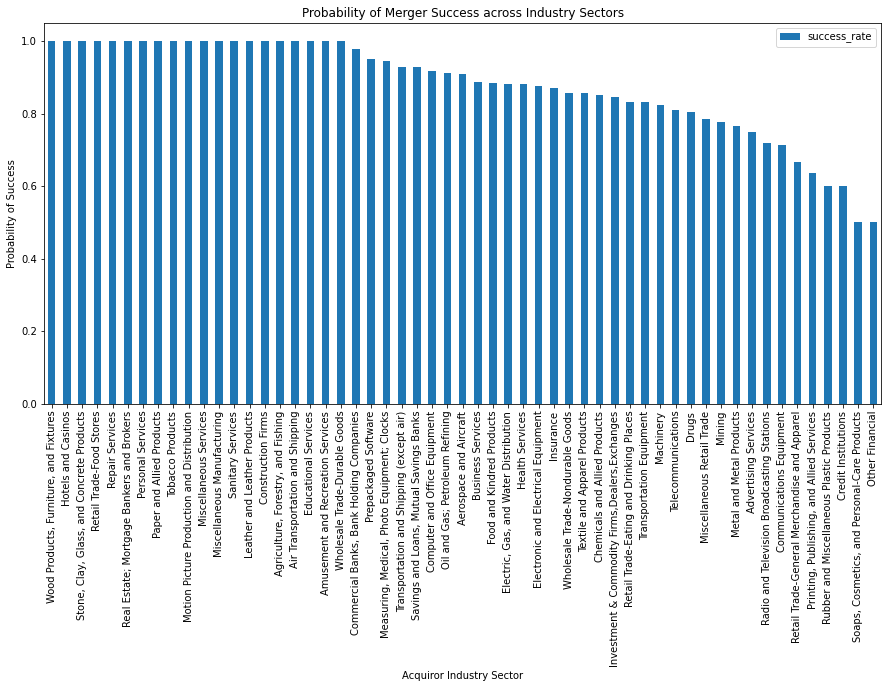

In [7]:
fig, ax = plt.subplots(figsize = (15, 7))
industry_compare_acq.reset_index().plot(kind = "bar", x = "acq_ind_sector", y = "success_rate", ax = ax)
plt.title("Probability of Merger Success across Industry Sectors")
plt.xlabel("Acquiror Industry Sector")
plt.ylabel("Probability of Success");

In [8]:
display(df)

,Success,Date Announced,Date Effective,Date Withdrawn,Deal Number,Target Name,Target Primary Ticker Symbol,Target Industry Sector,Acquiror Name,Acquiror Primary Ticker Symbol,Acquiror Industry Sector,Exchange Ratio,Price Per Share,Acquiror's price per share,Acquiror Closing Price 1 Day After Ann Date ($),Acquiror Closing Price 60 Days After Ann Date ($),Acquiror Closing Price 90 Days After Ann Date ($),Acquiror Closing Price 180 Days After Ann Date ($),Target Share Price 1 Day Prior to Announcement ($),Target Closing Price 1 Day After Ann Date ($),Target Closing Price 60 Days After Ann Date ($),Target Closing Price 90 Days After Ann Date ($),Target Closing Price 180 Days After Ann Date ($),Premium 1 day prior to announce- ment date,Premium 1 week prior to announce- ment date,Premium 4 weeks prior to ann. date,S&P 500 Closing Price 1 Day Before Announcement,Poison Pill,% sought,Ratio of Offer Price to EPS,Ratio of Deal Value to Sales,Ratio of Deal Value to EBIT,Ratio of Deal Value to EBITDA,Ratio of Deal Value to Net Income,Ratio of Enterprise Value to Sales,Ratio of Enterprise Value to EBIT,Ratio of Enterprise Value to EBITDA,Ratio of Enterprise Value to Net Income,Equity Value/ Net Sales,Ratio of Equity Value to EBIT,Ratio of Equity Value at Announcement to EBITDA,Ratio of Equity Value to Net Income,Target Ebit 3-Year Growth Rate (%),Target Ebit 5-Year Growth Rate (%),EBIT Margin,Target EBITDA Three Year Growth Rate,Target EBITDA Five Year Growth Rate,EBITDA Margin,Target Net Assets Three Year Growth Rate,Target Net Assets Five Year Growth Rate,Target Net Sales 5-Year Growth Rate (%),Total Fee %,Target Fee %,Target Total Assets 5-Year Growth Rate (%),Target Total Lia. 5-Year Growth Rate (%),Common Equity Multiple,Value / Net Assets,EBIT / Return on Assets,EBITDA ROA,Enterprise Value / Net Assets,Enterprise Value / Pre-tax Inc,Enterprise Value / Tangible Book Value,Ratio of Offer Price to Book Value,Target Net Sales LTM ($mil),EBIT Last Twelve Months ($ Mil),Pre-tax Income Last Twelve Months ($ Mil),Net Income Last Twelve Months ($ Mil),Target Net Assets ($mil),Target Total Assets ($mil),Target EBITDA LTM ($mil),Target Book Value Per Share LTM (US$),Target Common Equity ($mil),Target Earnings Per Share LTM (US$),Value Based on Effective Date ($mil),Value Common at Eff. Date ($mil),Equity Value at Effective Date ($mil),Target Book Value/sh One Year Prior,Target Book Value/sh Two Years Prior,Target Book Value/sh Three Years Prior,Target Capital Expend. One Year Prior ($ mil),Target Capital Expend. Two Years Prior ($ mil),Target Capital Expend. Three Years Prior ($ mil),Target Cash & Mktbl. Securities One Year Prior ($ mil),Target Cash & Mktbl. Securities Two Years Prior ($ mil),Target Cash & Mktbl. Securities Three Years Prior ($ mil),Host Curr. Target Long Term Debt One Year Prior (mil),Host Curr. Target Long Term Debt Two Years Prior (mil),Host Curr. Target Long Term Debt Three Years Prior (mil),Target Long- Term Liab. 1-Year Prior ($ mil),Target Long- Term Liab. 2-Years Prior ($ mil),Target Long- Term Liab. 3-Years Prior ($ mil),Target Net Cash Fr. Investing One Year Prior,Target Net Cash Fr. Investing Two Years Prior,Target Net Cash Fr. Investing Three Years Prior,Target Net Cash fr. Financing One Year Prior,Target Net Cash fr. Financing Two Years Prior,Target Net Cash fr. Financing Three Years Prior,Target Straight Debt One Year Prior ($ mil),Target Straight Debt Two Years Prior ($ mil),Target Straight Debt Three Years Prior ($ mil)
3,0,2012-01-13,NaT,2012-05-04,2379612020,Georgia Gulf Corp,GGC,Chemicals and Allied Products,Westlake Chemical Corp,WLK,Chemicals and Allied Products,NaN,35.00,NaN,56.340,65.690,61.120,54.010,24.48,33.48,33.07,32.06,27.23,42.97,62.94,89.39,1295.50,Yes,95.2,21.0,0.372,8.9,5.067,21.199,0.533,12.718,7.260,30.376,0.372,8.877,5.067,21.200,118.999,-7.857,0.042,27.36,-8.503,0.073,13.90,25.53,0.52,NaN,NaN,-7.09,-12.94,2.453,2.5,0.082,0.144,3.515,32.078,7.521,2.452,3222.884,135.038,53.5,56.5,488.7,1640.4

In [9]:
display(df.select_dtypes("object").columns)
display(df.select_dtypes("number").columns)

Index(['Target Name', 'Target Primary Ticker Symbol', 'Target Industry Sector',
       'Acquiror Name', 'Acquiror Primary Ticker Symbol',
       'Acquiror Industry Sector', 'Poison Pill'],
      dtype='object')

Index(['Success', 'Deal Number', 'Exchange Ratio', 'Price Per Share',
       'Acquiror's price per share',
       'Acquiror Closing Price 1 Day After Ann Date ($)',
       'Acquiror Closing Price 60 Days After Ann Date ($)',
       'Acquiror Closing Price 90 Days After Ann Date ($)',
       'Acquiror Closing Price 180 Days After Ann Date ($)',
       'Target Share Price 1 Day Prior to Announcement ($)',
       'Target Closing Price 1 Day After Ann Date ($)',
       'Target Closing Price 60 Days After Ann Date ($)',
       'Target Closing Price 90 Days After Ann Date ($)',
       'Target Closing Price 180 Days After Ann Date ($)',
       'Premium 1 day prior to announce- ment date',
       'Premium 1 week prior to announce- ment date',
       'Premium 4 weeks prior to ann. date',
       'S&P 500 Closing Price 1 Day Before Announcement', '% sought',
       'Ratio of Offer Price to EPS', 'Ratio of Deal Value to Sales',
       'Ratio of Deal Value to EBIT', 'Ratio of Deal Value to EBITDA',

In [10]:
def resample_df(df):
  new_df = deepcopy(df)
  new_df = new_df[["Success", "Date Announced"]].set_index("Date Announced")
  series = new_df["Success"]
  series = series.resample("1M").sum().ffill()
  
  return series

In [11]:
res_series = resample_df(df)
px.line(res_series, labels={"x": "Date Announced", "value": "Number of Mergers"})

In [50]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,  \
  RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, HalvingGridSearchCV, GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer, MissingIndicator
from sklearn import set_config
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix, accuracy_score

In [76]:
def preprocess_df(df):
  new_df = deepcopy(df)
  new_df.drop(columns=
    ["Target Name", "Target Primary Ticker Symbol",
    "Acquiror Name", "Acquiror Primary Ticker Symbol",
    "Date Announced", "Date Effective", "Date Withdrawn"], inplace=True)
  new_df = pd.get_dummies(
    new_df, columns=["Target Industry Sector", "Acquiror Industry Sector"],
    dummy_na = True,
    prefix = {
      "Target Industry Sector": "target_sector", "Acquiror Industry Sector": "acquiror_sector",
    }
  )
  new_df["Poison Pill"] = new_df["Poison Pill"].replace(to_replace=["Yes", "No"], value=[1, 0])

  return new_df


In [78]:
processed_df = preprocess_df(df)

X_train, X_test, y_train, y_test = train_test_split(
  processed_df[processed_df.columns.difference(["Success"])], 
  processed_df["Success"],
  random_state = SEED
)

In [81]:
numeric_cols = list(X_train.select_dtypes("number").columns)
categorical_cols = list(X_train.select_dtypes("object").columns)
all_cols = list(X_train.columns)

missing_values_transformer = Pipeline(steps = [
  ("na_indicator", MissingIndicator(sparse = False, features = "all"))
])

numeric_transformer = Pipeline(steps=[
  ("imputer", KNNImputer(n_neighbors=2)), ("num", MinMaxScaler())])
  
categorical_transformer = Pipeline(steps=[
  ("imputer'", SimpleImputer(strategy="most_frequent"))])

preprocessor = ColumnTransformer(transformers=[
  ("na_indicator", missing_values_transformer, all_cols),
  ("numeric", numeric_transformer, numeric_cols), 
  ("categorical", categorical_transformer, categorical_cols)
])

X_train_transformed = preprocessor.fit_transform(X_train)

In [82]:
vote_clf = VotingClassifier(estimators = [
  ("svm", SVC(kernel = "rbf", probability = True, random_state = SEED)),
  ("ridge", BaggingClassifier(base_estimator = RidgeClassifier())),
  ("knn", KNeighborsClassifier(p = 1)),
  ("grad_boost", BaggingClassifier(
    base_estimator = GradientBoostingClassifier(random_state = SEED)
  )),
  ("random_forest", BaggingClassifier(
    base_estimator = RandomForestClassifier(criterion = "gini", random_state = SEED)
  )),
  ("decision_tree", BaggingClassifier(
    base_estimator = DecisionTreeClassifier(criterion = "gini", random_state = SEED)
  ))
])

params = {
  "svm__C": [1e-5, 1e-3, 1, 1e3, 1e5],
  "ridge__base_estimator__alpha": [1, 10, 100, 1000],
  "knn__n_neighbors": [5, 7, 9],
  "grad_boost__base_estimator__n_estimators": [80, 100, 120],
  "grad_boost__base_estimator__max_depth": [3, 7, 11, 13],
  "random_forest__base_estimator__n_estimators": [80, 100, 120],
  "random_forest__base_estimator__max_depth": [3, 7, 11, 13],
}

grid = HalvingGridSearchCV(
  estimator = vote_clf, param_grid = params, cv = 5, n_jobs = -1,
  scoring = "f1"
)

In [84]:
grid.fit(X_train_transformed, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


29255 fits failed out of a total of 43200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3335 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_voting.py", line 324, in fit
    return super().fit(X, transformed_y, sample_weight)
  File "/Library/Frameworks/Python.f

HalvingGridSearchCV(estimator=VotingClassifier(estimators=[('svm',
                                                            SVC(probability=True,
                                                                random_state=42)),
                                                           ('ridge',
                                                            BaggingClassifier(base_estimator=RidgeClassifier())),
                                                           ('knn',
                                                            KNeighborsClassifier(p=1)),
                                                           ('grad_boost',
                                                            BaggingClassifier(base_estimator=GradientBoostingClassifier(random_state=42))),
                                                           ('random_forest',
                                                            BaggingClassifier(base_estimator=Random...
                    param_grid={'grad_boost__base_estimator__max_depth': [3, 7,
                                                                          11,
                                                                          13],
                                'grad_boost__base_estimator__n_estimators': [80,
                                                                             100,
                                                                             120],
                                'knn__n_neighbors': [5, 7, 9],
                                'random_forest__base_estimator__max_depth': [3,
                                                                             7,
                                                                             11,
                                                                             13],
                                'random_forest__base_estimator__n_estimators': [80,
                                                                                100,
                                                                                120],
                                'ridge__base_estimator__alpha': [1, 10, 100,
                                                                 1000],
                                'svm__C': [1e-05, 0.001, 1, 1000.0, 100000.0]},
                    scoring='f1')

In [85]:
with open("voting-v2.pkl", "wb") as f:
  pickle.dump(grid, f)

In [86]:
best_model = grid.best_estimator_
best_score = grid.best_score_
best_params = grid.best_params_

print(f"Best model: {best_model}\nBest score: {best_score}\nBest parameters: {best_params}")

Best model: VotingClassifier(estimators=[('svm',
                              SVC(C=1000.0, probability=True, random_state=42)),
                             ('ridge',
                              BaggingClassifier(base_estimator=RidgeClassifier(alpha=1))),
                             ('knn', KNeighborsClassifier(p=1)),
                             ('grad_boost',
                              BaggingClassifier(base_estimator=GradientBoostingClassifier(max_depth=7,
                                                                                          random_state=42))),
                             ('random_forest',
                              BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=3,
                                                                                      random_state=42))),
                             ('decision_tree',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42)))])
Best score: 

In [87]:
set_config(display="diagram")
display(best_model)

VotingClassifier(estimators=[('svm',
                              SVC(C=1000.0, probability=True, random_state=42)),
                             ('ridge',
                              BaggingClassifier(base_estimator=RidgeClassifier(alpha=1))),
                             ('knn', KNeighborsClassifier(p=1)),
                             ('grad_boost',
                              BaggingClassifier(base_estimator=GradientBoostingClassifier(max_depth=7,
                                                                                          random_state=42))),
                             ('random_forest',
                              BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=3,
                                                                                      random_state=42))),
                             ('decision_tree',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42)))])

In [88]:
def compute_metrics(y_test, y_pred):
  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  rec = recall_score(y_test, y_pred)
  roc = roc_auc_score(y_test, y_pred)
  conf = confusion_matrix(y_test, y_pred)
  return acc, prec, rec, roc, conf

In [89]:
X_test_transformed = preprocessor.transform(X_test)
y_pred = best_model.predict(X_test_transformed)
accuracy, precision, recall, roc_score, confusion_mat = compute_metrics(y_test, y_pred)

In [90]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_score}")
print(f"Confusion Matrix:\n{confusion_mat}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
ROC AUC: 1.0
Confusion Matrix:
[[ 40   0]
 [  0 259]]
